# Unit 5 - Financial Planning


In [125]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt

%matplotlib inline

In [126]:
# Load .env enviroment variables
load_dotenv('mykeys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [127]:
# Set current amount of crypto assets
my_btc = 1.9
my_eth = 6.2



In [128]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [129]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.9 BTC is $96573.20
The current value of your 6.2 ETH is $14155.10


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [130]:
# Current amount of shares
my_spy = 800
my_agg = 900

In [131]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
   alpaca_key,
   alpaca_secret_key,
   api_version="v2"
)

In [132]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-20", tz="America/New_York").isoformat() 

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portifolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portifolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-04-20 00:00:00-04:00  114.42  114.67  114.39  114.62  3674209  413.91   

                                                               
                               high     low   close    volume  
time                                                           
2021-04-20 00:00:00-04:00  415.0859  410.59  412.22  69715050

In [133]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portifolio['AGG']['close'])
spy_close_price = float(df_portifolio['SPY']['close'])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.62
Current SPY closing price: $412.22


In [134]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 800 SPY shares is $329776.00
The current value of your 900 AGG shares is $103158.00


### Savings Health Analysis

In [135]:
# Set monthly household income
monthly_income = 150000

# Create savings DataFrame
crypto = round(my_btc_value + my_eth_value,2)
shares = round(my_spy_value + my_agg_value,2)
total = {
    'amount' : [crypto,shares]
}
df_savings = pd.DataFrame(total,index = ['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,110728.3
shares,432934.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B5F201488>],
      dtype=object)

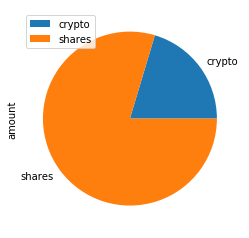

In [136]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)


In [137]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print(f"You don't have enough money in your savings. You need more ${emergency_fund - total_savings}")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [145]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-01', tz='America/New_York').isoformat()

In [146]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2017-01-12 00:00:00-05:00  108.78  108.90  108.6100  108.620  2876232  226.50   
2017-01-13 00:00:00-05:00  108.50  108.55  108.2610  108.440  3083926  226.73   
2017-01-17 00:00:00-05:00  108.81  108.87  108.6500  108.790  3253649  226.31   
2017-01-18 00:00:00-05:00  108.60  108.67  108.2350  108.315  2873994  226.54   
2017-01-19 00:00:00-05:00  108.06  108.16  107.9334  108.050  2220696  226.84   

                                                              
                             high      low   close    volume  
time                                                          
2017-01-12 00:00:00-05:00  226.75  224.955  226.57  59431700  
2017-01-13 00:00:00-05:00  227.40  226.690  227.03  42877069  
2017-01-17 00:00:00-05:00  226.78  225.800  226.29  44347527  
2017-01-18 00:00:00-05:00  226.80  225.900  226.74  42486413  
2017-01-19 00:00:00-05:00  227.00  225.410  225.95  47422295

In [147]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252 * 30    
)




In [148]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                      \
                             open    high       low    close   volume   
time                                                                    
2017-01-12 00:00:00-05:00  108.78  108.90  108.6100  108.620  2876232   
2017-01-13 00:00:00-05:00  108.50  108.55  108.2610  108.440  3083926   
2017-01-17 00:00:00-05:00  108.81  108.87  108.6500  108.790  3253649   
2017-01-18 00:00:00-05:00  108.60  108.67  108.2350  108.315  2873994   
2017-01-19 00:00:00-05:00  108.06  108.16  107.9334  108.050  2220696   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-01-12 00:00:00-05:00          NaN  226.50  226.75  224.955  226.57   
2017-01-13 00:00:00-05:00    -0.001657  226.73  227.40  226.690  227.03   
2017-01-17 00:00:00-05:00     0.003228  226.31  226.78  225.800  226.29   
2017-01-18 00:00:00-05:00    -0.004366  226.54  226.80  225.900  226.74   
2017-01-19 00:00:00-05:00    -0.002447  226.84  227.00  225.410  225.95   

                                                  
                             volume daily_return  
time                                              
2017-01-12 00:00:00-05:00  59431700          NaN  
2017-01-13 00:00:00-05:00  42877069     0.002030  
2017-01-17 00:00:00-05:00  44347527    -0.003259  
2017-01-18 00:00:00-05:00  42486413     0.001989  
2017-01-19 00:00:00-05:00  47422295    -0.003484

In [149]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995518,1.009521,1.008494,0.991522,1.005330,0.992837,1.014922,0.994343,1.014838,1.008085,...,0.996332,1.010763,1.012672,1.011846,0.984268,1.011202,0.994817,1.006143,1.009536,1.003900
2,0.997494,1.014405,1.002394,0.983475,1.008242,0.984398,1.030446,0.995995,1.024646,1.004807,...,0.997140,1.001780,1.010859,1.008021,0.972944,1.014247,0.994525,1.022779,1.019725,0.995204
3,0.997261,1.009826,1.004549,0.991265,1.006869,0.969004,1.032928,1.006296,1.021123,0.999294,...,0.994112,0.990856,1.011400,1.009505,0.984589,1.014990,1.001380,1.025256,1.009194,0.988455
4,1.004949,0.997931,1.005809,0.993545,0.993295,0.971325,1.044677,1.006994,1.027689,0.988928,...,0.989269,0.989280,1.009472,0.994396,0.981646,1.004460,1.005081,1.020300,1.001431,0.977770
5,1.007755,0.980313,1.005307,0.977219,0.987653,0.969648,1.039922,0.999350,1.019529,0.987469,...,1.005162,1.008594,1.003863,0.999263,0.985585,0.994711,1.015216,1.020418,1.009356,0.976653
6,1.011845,0.986927,1.011156,0.974652,0.995271,0.971027,1.046108,0.994321,1.018677,0.995337,...,0.983169,1.023077,0.994583,1.006806,0.978886,1.004192,1.019810,1.022906,1.005943,0.971313
7,0.999124,0.983100,1.023803,0.969150,1.003706,0.966875,1.047821,0.999736,1.025444,0.994699,...,0.977493,1.027546,1.009246,0.998918,0.978078,1.000257,1.027503,1.008770,0.992295,0.964081
8,0.986353,0.989379,1.017344,0.962833,0.998289,0.970528,1.052236,0.989690,1.014845,0.993293,...,0.987334,1.027014,1.008957,1.008942,0.991671,1.021783,1.030890,1.014703,0.981143,0.968409
9,0.985072,0.988977,1.023585,0.963889,0.998403,0.977563,1.059561,0.991238,1.025170,1.001268,...,0.987902,1.040461,1.018226,1.025053,0.995463,1.021232,1.037249,1.005171,0.975375,0.967087


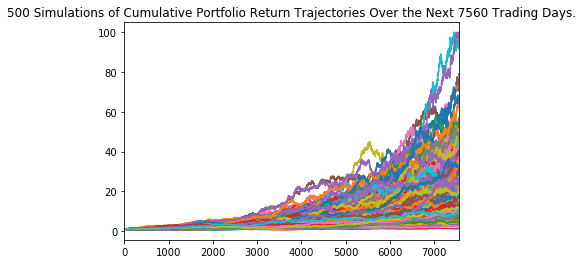

In [150]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()
line_plot

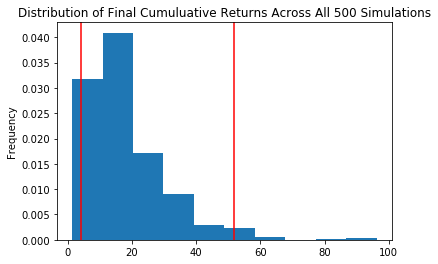

In [151]:
# Plot probability distribution and confidence intervals
MC_30years.plot_distribution()

### Retirement Analysis

In [152]:
# Fetch summary statistics from the Monte Carlo simulation results
statistics = MC_30years.summarize_cumulative_return()
# Print summary statistics
print(statistics)

count           500.000000
mean             18.271849
std              12.695869
min               1.341171
25%               9.465787
50%              15.238665
75%              22.901994
max              96.205997
95% CI Lower      4.197188
95% CI Upper     51.668155
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [153]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(statistics[8] *initial_investment,2)
ci_upper = round(statistics[9] *initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83943.77 and $1033363.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [154]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(statistics[8] *initial_investment,2)
ci_upper = round(statistics[9] *initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $125915.65 and $1550044.66


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [155]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252 * 5    
)



In [156]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992157,0.995764,1.013300,0.986003,1.003465,0.994055,0.992963,0.982208,0.994582,1.006316,...,1.015973,1.003217,0.997474,0.984917,0.996856,1.006573,1.001451,1.005458,0.997286,1.012025
2,0.991110,1.007323,1.009069,0.987538,1.005433,1.002137,0.999893,0.981901,1.004276,1.002413,...,1.002047,1.017942,1.000644,0.986288,0.991077,1.005189,0.997937,1.011227,0.993610,1.015097
3,0.983095,1.012164,1.008274,0.998703,1.012813,0.981892,0.998852,0.980855,1.010976,1.000706,...,0.994371,1.034192,0.996004,0.999939,0.996398,1.003162,0.999713,1.025417,0.987899,1.007981
4,0.988197,1.012769,1.023989,1.002724,1.003892,0.983393,1.003536,0.981488,0.997253,0.997687,...,0.989455,1.042962,0.986094,1.006232,0.995436,1.010183,0.994998,1.026598,0.995775,1.016497
5,0.983786,1.018776,1.024353,1.006818,1.002168,0.991144,1.002777,0.980266,1.014689,1.013880,...,0.990758,1.049332,0.980684,1.009923,0.988041,1.017357,0.996731,1.025534,0.993663,1.025670
6,0.987344,1.017527,1.016062,1.005199,0.999788,0.995716,0.999997,0.991825,1.015634,1.018247,...,1.006538,1.052916,0.977262,1.002592,0.991907,1.015060,0.999947,1.030532,0.994021,1.025953
7,0.989200,1.013157,1.014944,1.011668,1.007607,0.991586,0.999590,0.988952,1.014464,1.024272,...,1.003983,1.061484,0.982630,1.003849,0.991250,1.017246,1.011930,1.035631,0.994163,1.012817
8,0.995776,1.021829,1.010894,1.025223,1.014466,0.991455,0.996280,0.986384,1.005270,1.039083,...,1.012510,1.065180,0.985947,1.009910,0.996740,1.022300,1.005715,1.050985,0.990405,1.009801
9,0.998463,1.018364,1.006285,1.026195,1.011397,0.990286,0.995229,0.974621,1.012871,1.051121,...,1.003317,1.079738,0.995730,0.995592,1.006098,1.023220,1.005802,1.057279,0.988504,1.013385


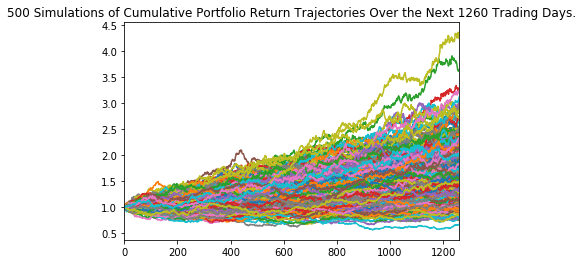

In [157]:
# Plot simulation outcomes
line_plot = MC_5years.plot_simulation()
line_plot

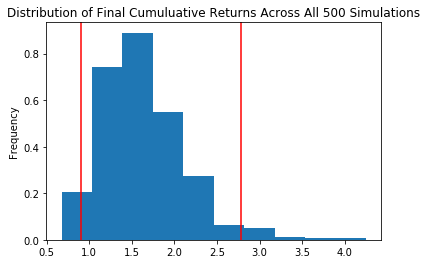

In [158]:
# Plot probability distribution and confidence intervals
MC_5years.plot_distribution()

In [159]:
# Fetch summary statistics from the Monte Carlo simulation results
statistics = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(statistics)

count           500.000000
mean              1.623374
std               0.477675
min               0.674363
25%               1.274908
50%               1.567649
75%               1.895737
max               4.247979
95% CI Lower      0.905745
95% CI Upper      2.785699
Name: 1260, dtype: float64


In [169]:
# Set initial investment
initial_investment = 270000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(statistics[8] *initial_investment,2)
ci_upper_five = round(statistics[9] *initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $270000 in the portfolio over the next 5 years will end within in the range of $304831.63 and $1460670.07


### Ten Years Retirement Option

In [161]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252 * 10    
)


In [162]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998731,1.005432,0.987575,1.004212,0.998545,1.006140,1.002288,1.011837,1.013520,1.012049,...,0.987312,1.003261,1.007107,0.992523,0.990368,0.998975,1.010508,0.996083,1.006560,1.013164
2,0.999614,1.010557,0.988174,1.011019,1.005570,1.009748,0.997601,1.010227,1.017940,1.014834,...,0.992676,1.013238,0.998061,0.989341,1.003232,0.981564,1.001265,0.994956,1.026681,1.015952
3,1.005515,1.010434,1.000151,1.011499,1.003596,1.017503,0.989707,1.015323,1.017305,1.019548,...,0.985569,1.014967,0.996292,0.977576,0.996859,0.985624,0.999508,0.988880,1.024398,1.014958
4,1.002341,0.993647,0.999042,1.019382,0.992967,1.007602,1.009309,1.023723,1.019045,1.023623,...,1.002739,1.029746,0.992658,0.972581,0.998116,0.986110,0.997347,0.993788,1.034247,1.013313
5,1.002631,0.985554,1.002783,1.035150,0.981732,1.000830,1.012760,1.033252,1.023502,1.034571,...,0.994582,1.031132,0.997542,0.970090,1.006161,0.963107,0.995498,1.004510,1.025373,1.000164
6,0.994013,0.983752,1.005727,1.036018,0.988552,1.009952,1.016639,1.024399,1.025869,1.037672,...,1.010063,1.032877,0.995177,0.974510,1.018680,0.979218,1.000129,0.996832,1.017507,1.000107
7,0.992689,0.985002,1.014860,1.037868,0.986022,1.020835,1.018965,1.039919,1.025223,1.034857,...,1.010288,1.029461,0.998761,0.975616,1.030060,0.973616,1.013715,0.998945,1.033898,0.997880
8,0.994916,0.987095,1.009967,1.044710,0.975634,1.016280,1.012759,1.034020,1.034546,1.033575,...,1.000491,1.038657,0.995564,0.984690,1.029021,0.973968,1.009169,1.008017,1.026039,0.982686
9,0.993006,0.986447,1.017668,1.049557,0.991850,1.018662,1.020762,1.036433,1.043538,1.019493,...,1.006969,1.033734,0.992794,0.991868,1.028748,0.977099,1.012941,1.001206,1.007019,0.999611


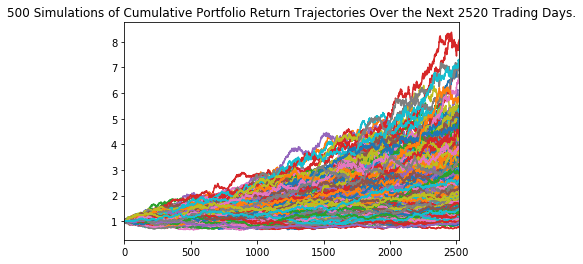

In [163]:
# Plot simulation outcomes
line_plot = MC_10years.plot_simulation()
line_plot

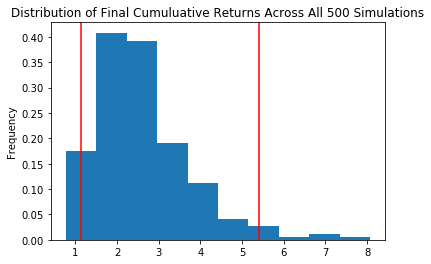

In [164]:
# Plot probability distribution and confidence intervals
MC_10years.plot_distribution()

In [165]:
# Fetch summary statistics from the Monte Carlo simulation results
statistics = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(statistics)

count           500.000000
mean              2.621324
std               1.147620
min               0.772463
25%               1.816058
50%               2.425068
75%               3.078777
max               8.073249
95% CI Lower      1.129006
95% CI Upper      5.409889
Name: 2520, dtype: float64


In [168]:
# Set initial investment
initial_investment = 270000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(statistics[8] *initial_investment,2)
ci_upper_ten = round(statistics[9] *initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $270000 in the portfolio over the next 10 years will end within in the range of $304831.63 and $1460670.07
